## Решающие деревья

In [49]:
# импортируем все необходимые бюиблиотеки

from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

Перед тем, как обучить наше первое дерево решений на каких-то более-менее реальных данных, попрактиковаться с настоящими задачками, мы сначала разберём дерево решений на таком игрушечном датафрейме, посмотрим какая математика лежит внутри, какая основная идея, а потом уже перейдём к реальной практике.

В списке импортов выше появился новый модуль:

from sklearn import tree

Он понадобится нам для обучения решающих деревьев и использовать их для предсказания, обучения моделей и т.д.

In [50]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


У нас есть две переменные X_1, X_2 и Y, принимающие значения 0 или 1. То есть их можно воспринимать как некие бинарные номинативные переменные.

Наша с вами задача: научиться при помощи дерева решений предсказывать значения переменной Y, основываясь на значениях переменной X_1 и X_2.

#### Cоздадим дерево решений и сохраним его в некую переменную-классификатор

In [51]:
clf = tree.DecisionTreeClassifier()     # модуль tree - это модуль sklearn, который мы импортировали под этим именем

Обратите внимание, что дерево решений - это объект, имеющий свои методы и атрибуты. Так же, как например и пандасовский датафрейм.

В python классификатор это некоторый объект у которого есть методы:

- обучиться
- предсказать что-нибудь
- и т.д.

для критерия, использующегося для обучения, будем использовать так называемую энтропию.

In [52]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy')

In [53]:
clf.__dict__        # посмотреть что внутри у обученной/обучаемой модели

{'criterion': 'entropy',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0}

Итак, для того чтобы обучить наше первое дерево решений давайте сделаем небольшую предобработку данных.

1) Сохраним все фичи в переменную X.
2) А переменную Y сохраним в переменную y и пусть это будет пандасовская серия.

In [54]:
X = data[['X_1', 'X_2']]
y = data.Y

в большинстве случаев, когда мы используем python для машинного обучения (используем не обязательно библиотеку sklearn), всё-таки чаще всего у нас есть две основные сущности:

- те данные, которые мы используем для обучения - X
- то, что мы предсказываем - y

#### Обучаем модель:
передаем ей две переменные - фичи и некую соответствующую ей серию

In [55]:
clf.fit(X, y)       # обучили модель разделять наблюдения на те, у которых у=1 и у=0

DecisionTreeClassifier(criterion='entropy')

Внешне ничего не поменялось. Но если у нас раньше было пустое, ничего не знающее, одинокое дерево решений, которое только знало как можно чему-то обучаться, но не знало ничего ни про наши X и Y, ни про наши данные. То теперь мы дали ему переменные, в которых есть какая-то хитрая взаимосвязь, позволяющая предсказать y.

И вот дерево решений довольно быстро обучилось. Внешне это не очень заметно, но давайте теперь попробуем вытащить те знания, которые дерево решений сформировало по нашим данным.

#### импортируем нужные библиотеки для визуализации

In [56]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [57]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70%; !important;}</style>"
HTML(style)

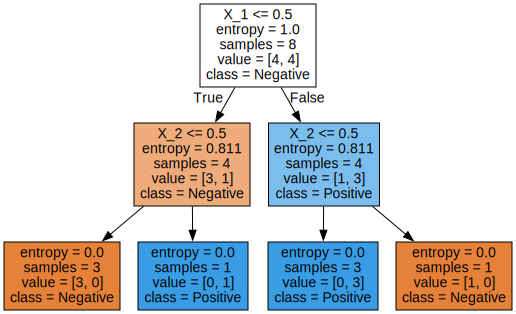

In [58]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

### Анализ результатов:
1) Сначала модель проверяет переменную х1:
- если х1 < 0,5 (х1 =0 - True), то в табличке данных видим, что для у значения в основном 0 (3 значения =0, 1 знач =1)
- поэтому класс для ветки True: Negative, values=[3,1] т.е 3 знач нулевых, 1 знач единичное; всего наблдений - 4(samples)
- аналогично для ветки False (x1>0.5 то есть х1=1): класс Positive, значения [1,3], всего 4 наблюдения
2) теперь каждый из полученных классов разбиваем по переменной х2:
- если х2< 0,5 (True) для ветки х1<0,5 - видим три наблюдения для у = 0 и ни одного для у=1 (value =[3,0]) - класс Negative
- если х2> 0,5 (False) для ветки х1<0,5 - видим одно наблюдение для у = 1 и ни одного для у=0 (value =[0,1]) - класс Positive
- если х2< 0,5 (True) для ветки х1>0,5 - видим три наблюдения для у = 1 и ни одного для у=0 (value =[0,3]) - класс Positive
- если х2> 0,5 (False) для ветки х1>0,5 - видим одно наблюдение для у = 0 и ни одного для у=1 (value =[1,0]) - класс Negative

Таким образом, дерево помогло безошибочно разделить все наши точки на те, у которых y=0 или y=1.

#### но что же такое энтропия?
- а это характеристика, которая определяет насколько точно проведена классификация и изменяется от 0 до 1
- чем больше неопределенность (т.е вероятность отнесение результатов наблюдений возможно как в одну, так и в другую сторону), тем выше энтропия
- наибольшего значения энтропия достигает при значении вероятности 1/2 
- математически - это сумма произведений вероятности(положительного или отрицательного исхода) на двоичный логарифм такой вероятности
- **по сути, энтропия - это мера беспорядка**

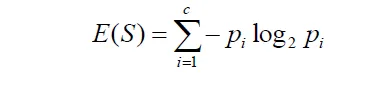

График изменения энтропии в процессе классификации:

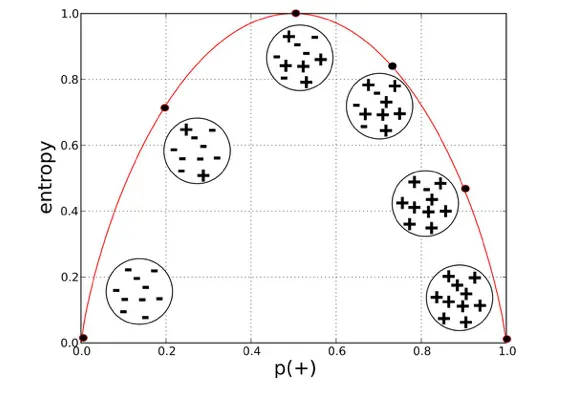

#### но как машина определяет, как правильно выбирать переменную (х1 или х2) для первичного сплита?
для этого существует показатель **information gain**, который определяет правильность выбора: чем он БОЛЬШЕ, тем правильнее сделан выбор:

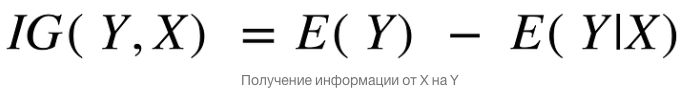

IG = Начальная энтропия (без учета влияния переменных) - Энтропия после деления (сплита)

Мы просто вычитаем энтропию Y с учетом X из энтропии только Y, чтобы рассчитать уменьшение неопределенности относительно Y с учетом дополнительной информации X об Y. Это называется получением информации. Чем больше уменьшение этой неопределенности, тем больше информации об Y получается из X
- подробнее см степ https://stepik.org/lesson/223994/step/4?unit=196798

#### еще один способ визуализировать дерево решений через библиотеку scikit-learn-0.21.0.

In [59]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


[Text(0.5, 0.8333333333333334, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

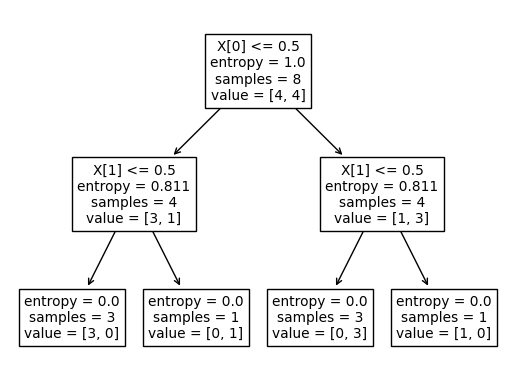

In [60]:
tree.plot_tree(clf.fit(X, y))

### поиграться с исходным датасэтом, чтобы увидеть разные деревья можно так (см внутри:)

перепишем исходный датасэт:

In [61]:
data1 = pd.DataFrame({
    'X_1': [1, 1, 1, 1, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 0, 1, 0, 0, 0, 0]
})
data1

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,0
3,1,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


заново обучим модель по новому датасэту

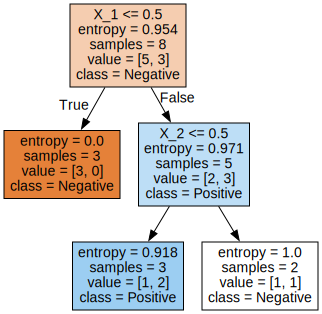

In [62]:
X1 = data1[['X_1', 'X_2']]
y1 = data1.Y

clf_1 = tree.DecisionTreeClassifier(criterion='entropy')
clf_1.fit(X1, y1) 
graph = Source(tree.export_graphviz(clf_1, out_file=None,
                                    feature_names=list(X1),
                                    class_names=['Negative', 'Positive'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

Результаты:
1) сначала бьем дерево по х1:
- если меньше 0.5 (то есть 0) - то ветка True, всего 3 наблюдения, которые разбились так: 3 наблюдений нулевые (Negative), 0 наблюдений единица (Positive) - весь класс negative
- если больше 0.5 (то есть 1) - то ветка False, всего 5 наблюдений, которые разбились так: 2 наблюдений нулевые (Negative), 3 наблюдений единица (Positive) - весь класс positive
2) теперь для доклассификации используем переменную х2:
- если меньше 0,5 (0) - видим одно нулевое значение у и два единица - весь класс Positive
- если больше 0,5 (1) - видим одно нулевое наблюдение и одно единичное  - **почему-то весь класс Negative**

Сделаем это еще раз: попробуем новый датасэт:

In [63]:
data2 = pd.DataFrame({
    'X_1': [1, 1, 1, 1, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'X_3': [0, 1, 0, 1, 0, 1, 0, 1],
    'Y': [1, 1, 0, 1, 0, 0, 0, 0]
})
data2

,X_1,X_2,X_3,Y
0,1,0,0,1
1,1,0,1,1
2,1,0,0,0
3,1,1,1,1
4,0,0,0,0
5,0,0,1,0
6,0,0,0,0
7,1,1,1,0


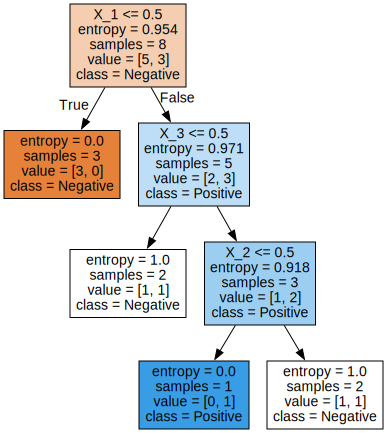

In [64]:
X2 = data2[['X_1', 'X_2', 'X_3']]
y2 = data2.Y

clf_2 = tree.DecisionTreeClassifier(criterion='entropy')
clf_2.fit(X2, y2) 
graph = Source(tree.export_graphviz(clf_2, out_file=None,
                                    feature_names=list(X2),
                                    class_names=['Negative', 'Positive'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

### Задача про собак и кошек (классификация):
на этом примере можно посчитать каждую энтропию и Information gain 

In [66]:
cat_dogs_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv')

cat_dogs_df

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик


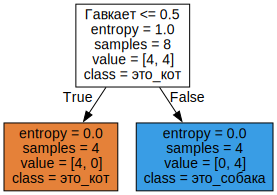

In [ ]:
X = cat_dogs_df[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = cat_dogs_df.Вид

clf_cd = tree.DecisionTreeClassifier(criterion='entropy')
clf_cd.fit(X, y) 
graph = Source(tree.export_graphviz(clf_cd, out_file=None,
                                    feature_names=list(X),
                                    class_names=['это_кот', 'это_собака'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

Окей, возьмем **усложненный датасэт по собакам и кошкам:**

In [68]:
new_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')
new_df

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


посчитаем энтропию и IG по каждой из переменных:

Формула IG = E(Y) - E(Y/x)
- где E(Y/x) = n1/N* E1 + n2/N* E2 , где:
- n1 и n2 - количество наблюдений для первого и второго значения переменной
- N - всего количество наблюдений для переменной
- Е1 и Е2 - значение энтропии для каждого из значений переменной

Изначальная энтропия (E(y)) равна:

In [76]:
-(4/10*np.log2(4/10)+ 6/10*np.log2(6/10))   # все собаки/на всех животных + все кошки/на всех животных

0.9709505944546686

1) шерстист

In [ ]:
-(4/9*np.log2(4/9)+ 5/9*np.log2(5/9))   # энтропия для шерстист =0

0.9910760598382222

In [70]:
-(1/1*np.log2(1/1)) # энтропия для шерстист =1

-0.0

In [84]:
# тогда значение IG для переменной  "шерстист"
0.9709505944546686 - (1/10*0 + 9/10*0.9910760598382222)

0.07898214060026854

2) гавкает

In [71]:
-(5/5*np.log2(5/5))  # энтропия для гавкает =0

-0.0

In [72]:
-(4/5*np.log2(4/5)+ 1/5*np.log2(1/5))   # энтропия для гавкает =1

0.7219280948873623

In [82]:
# тогда значение IG для переменной  "гавкает"
0.9709505944546686 - (5/10*0 + 5/10*0.7219280948873623)

0.6099865470109874

3) лазает по деревьям

In [73]:
-(4/4*np.log2(4/4))   # энтропия для лазает =0

-0.0

In [74]:
-(6/6*np.log2(6/6))   # энтропия для лазает = 1

-0.0

In [83]:
# тогда значение IG для переменной  "лазает"
0.9709505944546686 - (4/10*0 + 6/10*0)

0.9709505944546686

### Еще одна задача из лекции: https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8
Посчитаем энтропию и IG для каждой характеристики и построим решающее дерево

In [106]:
test_data_1 = pd.DataFrame({'Credit_Rating':['Excelent', 'Good', 'Poor'],
                            'Normal':[3,4,0],
                            'High':[1,2,4]})
test_data_1['total'] = test_data_1.Normal + test_data_1.High

test_data_1.loc[3] = ['TOTAL']+ [sum(test_data_1[column]) for column in list(test_data_1.keys())[1:]]

test_data_1

,Credit_Rating,Normal,High,total
0,Excelent,3,1,4
1,Good,4,2,6
2,Poor,0,4,4
3,TOTAL,7,7,14


Чтобы построить дерево, придется переформатировать данные так:

Критерий Кредитный рейтинг делится так:
- Великолепный = 0
- Хороший = 1
- Плохой = 0

Целевая переменная Ответственность имеет две градации:
- нормальный = 0
- Высокий = 1

In [122]:
data_for_tree = pd.DataFrame({'Credit_rating':[2,2,2,2,1,1,1,1,1,1,0,0,0,0], 
                              'Liability':[0,0,0,1,0,0,0,0,1,1,1,1,1,1]})

data_for_tree

,Credit_rating,Liability
0,2,0
1,2,0
2,2,0
3,2,1
4,1,0
5,1,0
6,1,0
7,1,0
8,1,1
9,1,1


In [ ]:
# маленькое отступление - описать, как можно поменять форму входного массива
# если возникает ошибка при запуске модели по типу неверного массива (в качестве предиктора выступает одномерный массив
# вместо двумерного), то его стоит изменить таким образом:

one_d_arr = [2020, 1992, 1972]

two_d_arr_from_reshape = one_d_arr.reshape(-1, 1)   # обрати внимание, что для первого значения передается минус 1
                                                    # это дает методу понять, что конечное значение первого измерения массива
                                                    # будет равно ровно тому, сколько значений было в исходном одномерном массиве
two_d_arr_from_reshape  
# вернет массив в двумерном виде ([[2020], [1992], [1972]])

two_d_arr_from_reshape.shape        # запрос формы нового массива вернет кортеж - (3, 1)

# и если теперь зашить этот массив в датасэт, то мы получим таблицу с числом строк 3 и 1 столбцом


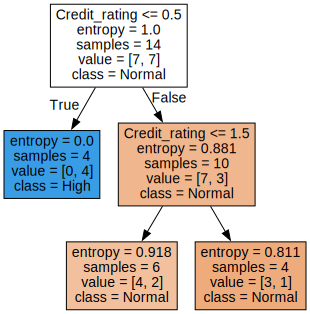

In [139]:
X_cr = data_for_tree[['Credit_rating']]     # запомни как важно определить форму массива, используемого в качестве критерия!
                                            # двойные скобки переведут его в форму 2D-array, иначе получишь ошибку неприведенных данных
y_cr = data_for_tree.Liability


clf_credit = tree.DecisionTreeClassifier(criterion='entropy')
clf_credit.fit(X_cr, y_cr) 
graph = Source(tree.export_graphviz(clf_credit, out_file=None,
                                    feature_names=list(X_cr),
                                    class_names=['Normal', 'High'],       # здесь добавили имена классам ([y=0, y=1])
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

Мы обучили модель, которая разбила на классы, пользуясь логикой: **уменьшай энтропию!**

- стартовая энтропия (до деления) составляет 1 (7 наблюдений с высоким рейтингом, 7 наблюдений с нормальным)
- минимальная энтропия (=0) дает значение показателя Плохой кредитный рейтинг (делит наши наблюдения явным образом: 0 нормальных против 4 высоких) - поэтому машина начинает деление с нее
- следующее значение энтропии (0.881) делит Нормальный класс Ответственности на две части
- в обоих случаях количество наблюдений Нормального класса будет превышать число наблюдений Высокого класса: 4 против 2 для хорошей кредитной истории (энтропия 0.918) и 3 против 1 для велколепной кредитной истории (энтропия 0.811)

Здесь целевая переменная Ответственность принимает два значения: Normal and High

In [112]:
transposed_test_data_1 = test_data_1.T               # транспонировать (поменять местами столбцы и строки) в датасэт можно так
                            # либо df.transpose()
transposed_test_data_1

,0,1,2,3
Credit_Rating,Excelent,Good,Poor,TOTAL
Normal,3,4,0,7
High,1,2,4,7
total,4,6,4,14


Считаем энтропию для каждого показателя

In [118]:
ent_ex = - ((3/4)*np.log2(3/4)+ (1/4)*np.log2(1/4))
ent_good = - ((4/6)*np.log2(4/6)+ (2/6)*np.log2(2/6))
ent_poor = - ((4/4)*np.log2(4/4))
ent_liability = - ((7/14)*np.log2(7/14)+ (7/14)*np.log2(7/14))

print('Энтропия для Великолепно', ent_ex,'\n',
      'Энтропия для Хорошо', ent_good, '\n',
      'Энтропия для Плохо', ent_poor)

print()
print('Общая Энтропия до деления', ent_liability)

# считаем средневзешенную энтропию с учетом критерия Кредитный рейтинг (имеет три градации - Великолепно, Хорошо, Плохо):
E_liab_CR = 4/14*ent_ex + 6/14*ent_good + 4/14* ent_poor

print('Средневзвешенная энтропия при делении по критерию Кредитный рейтинг', E_liab_CR)

Энтропия для Великолепно 0.8112781244591328 
 Энтропия для Хорошо 0.9182958340544896 
 Энтропия для Плохо -0.0

Общая Энтропия до деления 1.0
Средневзвешенная энтропия при делении по критерию Кредитный рейтинг 0.6253491072973906


Считаем Information gain для критерия Кредитный рейтинг:

In [119]:
ig_ex = ent_liability - E_liab_CR

print(ig_ex)

0.37465089270260943


Знание кредитного рейтинга помогло нам уменьшить неопределенность в отношении нашей целевой переменной, ответственности